In [2]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
# Scenario: A salesman has scheduled two appointments to sell encyclopedias. His
# first appointment will lead to a sale with probability 0.3, and his second will
# lead independently to a sale with probability 0.6. Any sale made is equally
# likely to be either for the deluxe model, which costs Rs. 1000, or the standard
# model, which costs Rs. 500. Let X be the random variable representing the total
# Rupee value of sales. What are the different values that X can take? What are
# the associated probabilities?

# The implementation below can be simplified further as shown in the next code
# cell

# Sampling space for appointment success (0 corresponds to no sale, 1 corresponds to a sale)
s_appointment = c(0, 1)

# Appointment success and failure probabilities
p_appointment = matrix(nrow  = 2, ncol = 2, c(0.7, 0.4, 0.3, 0.6), byrow = TRUE)

# Sampling space for book type 
s_book = c('s', 'd')

# Book type probabilities
p_book = c(0.5, 0.5)

result = numeric(2)  
# Simulate whether sales happen in first and second appointments
for (j in c(1:2)){
  result[j] = sample(s_appointment, size = 1, prob = p_appointment[, j])
}  
earnings = 0
if (result[1] == 1){
  booktype = sample(s_book, size = 1, prob = p_book)
  if (booktype == 's'){
      earnings = earnings + 500
  }
  else{
      earnings = earnings + 1000
  }
}
if (result[2] == 1){
  booktype = sample(s_book, size = 1, prob = p_book)
  if (booktype == 'i'){
      earnings = earnings + 500
  }
  else{
      earnings = earnings + 1000
  }
}
result
earnings

[1] 0 1

[1] 1000

In [5]:
# Scenario:A salesman has scheduled two appointments to sell encyclopedias. His
# first appointment will lead to a sale with probability 0.3, and his second will
# lead independently to a sale with probability 0.6. Any sale made is equally
# likely to be either for the deluxe model, which costs Rs. 1000, or the standard
# model, which costs Rs. 500. Let X be the random variable representing the total
# Rupee value of sales. What are the different values that X can take? What are
# the associated probabilities?

# Sampling space for appointment success (0 corresponds to no sale, 1 corresponds to a sale)
s_appointment = c(0, 1)

# Appointment success and failure probabilities
p_appointment = matrix(nrow  = 2, ncol = 2, c(0.7, 0.4, 0.3, 0.6), byrow = TRUE)

# Sampling space for book type 
s_book = c(500, 1000)

# Book type probabilities
p_book = c(0.5, 0.5)

nsimulations = 1e6

# Simulate one trial (one day) of the sales experiment
salesResult = function(){
  result = numeric(2)  
  # Simulate whether sales happen in first and second appointments
  for (j in c(1:2)){
      result[j] = sample(s_appointment, size = 1, prob = p_appointment[, j])
      }    
  # Calculate earnings if sales happen in first and second appointments
  return(ifelse(result[1] == 1, sample(s_book, size = 1, prob = p_book), 0) +
  ifelse(result[2] == 1, sample(s_book, size = 1, prob = p_book), 0))
}

simulatedData = replicate(nsimulations, salesResult())
#simulatedData
mean(simulatedData == 0) # an approximtion to P(X = 0)
mean(simulatedData == 500) # an approximtion to P(X = 500)
mean(simulatedData == 1000) # an approximtion to P(X = 1000)
mean(simulatedData == 1500) # an approximtion to P(X = 1500)
mean(simulatedData == 2000) # an approximtion to P(X = 2000)
table(simulatedData)
table(simulatedData) / nsimulations


[1] 0.280215

[1] 0.27047

[1] 0.314541

[1] 0.090104

[1] 0.04467

simulatedData
     0    500   1000   1500   2000 
280215 270470 314541  90104  44670 

simulatedData
       0      500     1000     1500     2000 
0.280215 0.270470 0.314541 0.090104 0.044670 

In [18]:
# This is a variant of the salesman problem

# Scenario: A salesman has scheduled two appointments to sell insurance plans. His
# first appointment will lead to a sale with probability 0.3, and his second
# will lead independently to a sale with probability 0.6. In the morning appointment,
# the salesman is equally likely to see both insurance types, and in the afternoon
# appointment, ther is a 70% chance that he sells the individual insurance. The
# individual insurance costs Rs. 500 and the family insurance costs Rs. 1000. 
# Let X be the random variable representing the total Rupee value of sales. 
# What are the different values that X can take? What are the associated probabilities?

# Sampling space for appointment success (0 corresponds to no sale, 1 corresponds to a sale)
s_appointment = c(0, 1)

# Appointment success and failure probabilities
p_appointment = matrix(nrow  = 2, ncol = 2, c(0.7, 0.4, 0.3, 0.6), byrow = TRUE)

# Sampling space for insurance type 
s_insurance = c(500, 1000)

# Insurance type probabilities
p_insurance = matrix(nrow  = 2, ncol = 2, c(0.5, 0.5, 0.7, 0.3), byrow = TRUE)

nsimulations = 1e3

# Simulate one trial (one day) of the sales experiment
salesResult = function(){
  result = numeric(2)  
  # Simulate whether sales happen in first and second appointments
  for (j in c(1:2)){
      result[j] = sample(s_appointment, size = 1, prob = p_appointment[, j])
      }    
  # Calculate earnings if sales happen in first and second appointments
  return(ifelse(result[1] == 1, sample(s_insurance, size = 1, prob = p_insurance[, 1]), 0) +
  ifelse(result[2] == 1, sample(s_insurance, size = 1, prob = p_insurance[, 2]), 0))
}

simulatedData = replicate(nsimulations, salesResult())
#simulatedData
mean(simulatedData == 0) # an approximtion to P(X = 0)
mean(simulatedData == 500) # an approximtion to P(X = 500)
mean(simulatedData == 1000) # an approximtion to P(X = 1000)
mean(simulatedData == 1500) # an approximtion to P(X = 1500)
mean(simulatedData == 2000) # an approximtion to P(X = 2000)
table(simulatedData)
table(simulatedData) / nsimulations

[1] 0.288

[1] 0.33

[1] 0.252

[1] 0.086

[1] 0.044

simulatedData
   0  500 1000 1500 2000 
 288  330  252   86   44 

simulatedData
    0   500  1000  1500  2000 
0.288 0.330 0.252 0.086 0.044 

**Scenario**: A salesman has scheduled two appointments to sell encyclopedias. His first appointment will lead to a sale with probability 0.3, and his second will lead independently to a sale with probability 0.6. Any sale made is equally
likely to be either for the deluxe model, which costs Rs. 1000, or the standard
model, which costs Rs. 500. Let X be the random variable representing the total
Rupee value of sales. What are the different values that X can take? What are
the associated probabilities?

$X$ = total earnings from one day 

$X$ is a discrete random variable 

$X = 0, 500, 1000, 1500, 2000$

$P(X = 0)  = 0.28, P(X = 500) = 0.31, P(X = 1000) = 0.275, P(X = 1500) = 0.095, P(X = 2000) = 0.04$

Probability Mass Function (PMF) of the random variable $X$ is denoted as $P_X(x),$ where $x$ represents the possible values that the random variable $X$ can take.

$P_X(0) = P(X = 0) = 0.28$

$P_X(500) = P(X = 500) = 0.27$

$P_X(1000) = P(X = 1000) = 0.315$

$P_X(1500) = P(X = 1500) = 0.09$

$P_X(2000) = P(X = 2000) = 0.045$

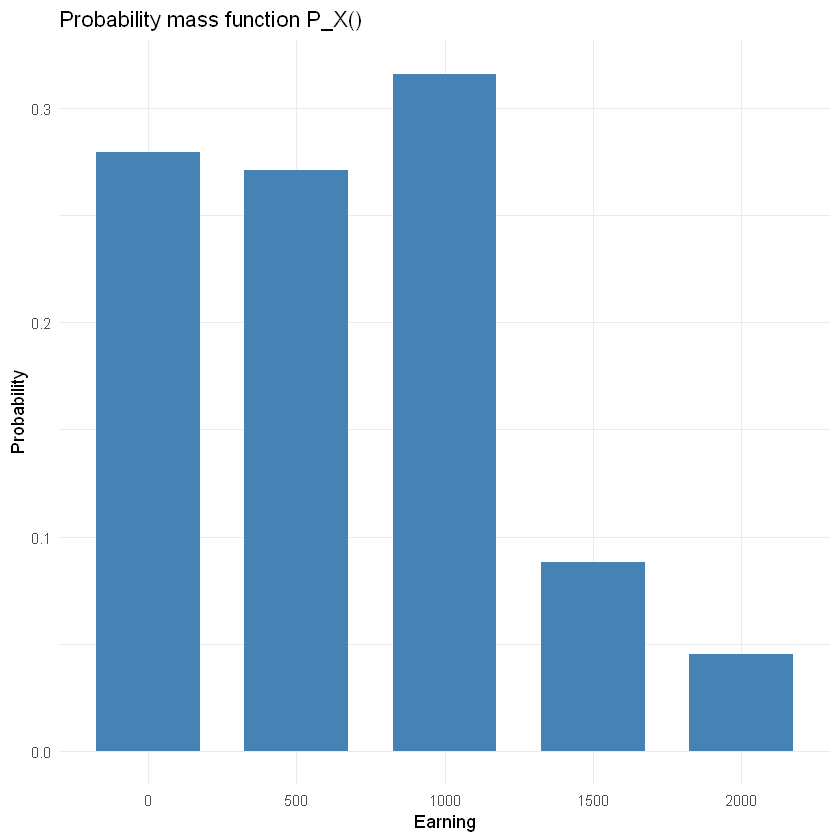

In [27]:
# Sampling space for appointment success (0 corresponds to no sale, 1 corresponds to a sale)
s_appointment = c(0, 1)

# Appointment success and failure probabilities
p_appointment = matrix(nrow  = 2, ncol = 2, c(0.7, 0.4, 0.3, 0.6), byrow = TRUE)

# Sampling space for book type 
s_book = c(500, 1000)

# Book type probabilities
p_book = c(0.5, 0.5)

nsimulations = 1e5

# Simulate one trial (one day) of the sales experiment
salesResult = function(){
  result = numeric(2)  
  # Simulate whether sales happen in first and second appointments
  for (j in c(1:2)){
      result[j] = sample(s_appointment, size = 1, prob = p_appointment[, j])
      }    
  # Calculate earnings if sales happen in first and second appointments
  return(ifelse(result[1] == 1, sample(s_book, size = 1, prob = p_book), 0) +
  ifelse(result[2] == 1, sample(s_book, size = 1, prob = p_book), 0))
}

simulatedData = replicate(nsimulations, salesResult())

# Convert simulatedData into a dataframe
dfSales = as.data.frame(table(simulatedData))

# Add names to the columns
colnames(dfSales) = c('Earning', 'Frequency')

# Add a bew column with proportion (probability) values 
dfSales['Probability'] = dfSales['Frequency'] / nsimulations

#head(dfSales, 5)

p = ggplot(data = dfSales, aes(x = Earning, y = Probability))+
geom_col(width = 0.7, fill = 'steelblue')+
ggtitle('Probability mass function P_X()')+
theme_minimal()
p

Expected value of the random variable $X$ is defined as the wieghted sum of the possible values $X$ can take with the corresponding probabilities:

$E[X] = \sum_xxP_X(x),$ where $x = 0, 500, 1000, 1500, 2000.$

$E[X] = 0\times P_X(0)+500\times P_X(500)+1000\times P_X(1000)+1500\times P_X(1500)+2000\times P_X(2000).$

$\begin{align*}E[X] &\approx 0 \times\underbrace{\frac{\text{No. of times 0 appeared}}{\text{nsimulations}}}_{\text{approximation to }P_X(0)}+500 \times\underbrace{\frac{\text{No. of times 500 appeared}}{\text{nsimulations}}}_{\text{approximation to }P_X(500)}+500 \times\underbrace{\frac{\text{No. of times 1000 appeared}}{\text{nsimulations}}}_{\text{approximation to }P_X(1000)}+1500 \times\underbrace{\frac{\text{No. of times 1500 appeared}}{\text{nsimulations}}}_{\text{approximation to }P_X(1500)}+2000 \times\underbrace{\frac{\text{No. of times 2000 appeared}}{\text{nsimulations}}}_{\text{approximation to }P_X(2000)}.\end{align*}$

So, we see that the expected value of $X$ is approximately the long-term average of the simulated (or realized) values of $X.$

In [29]:
# Expected earnings using simulated values
mean(simulatedData) # long term average of the realizations of X

# Expected earnings using the theoretical definition
x = c(0, 500, 1000, 1500, 2000)
p = c(0.28, 0.27, 0.315, 0.09, 0.045)
sum(x * p)

# pmf = table(simulatedData) / nsimulations
# pmf
# p = as.vector(pmf)
# p
# x = as.numeric(names(pmf))

[1] 674.535

[1] 675

Variance of the random variable $X,$ denoted as $\text{var}[X],$ is the expected squared deviation of $X$ from its expected value. In simple terms, variance of $X$ is the expected value of the random variable $(X-E[X])^2.$ Note that the possible values that this random variable can take are $\left(\underbrace{0-675}_{\text{when }X=0}\right)^2, \left(\underbrace{500-675}_{\text{when }X=500}\right)^2, \left(\underbrace{1000-675}_{\text{when }X=1000}\right)^2, \left(\underbrace{1500-675}_{\text{when }X=1500}\right)^2, \left(\underbrace{2000-675}_{\text{when }X=2000}\right)^2,$ with corresponding probabilities $P(X=0), P(X=500), P(X=1000), P(X=1500), P(X=2000),$ respectively.

$\begin{align*}\text{Var}[X] &= E[(X-E[X])^2]\\&=
\sum_x (x-E[X])^2\times P_X(x)\\&= (0-675)^2\times P_X(0)+(500-675)^2\times P_X(500)+(1000-675)^2\times P_X(1000)+(1500-675)^2\times P_X(1500)+(2000-675)^2\times P_X(2000)\\&(0-675)^2\times 0.28+(500-675)^2\times 0.27+(1000-675)^2\times 0.315+(1500-675)^2\times 0.09+(2000-675)^2\times 0.045.\end{align*}$

Standard deviation of the random variable $X$

$\begin{align*}\text{SD}[X] &= \sqrt{E\left[(X-E[X])^2\right]}\end{align*}$

In [30]:
# Variance of the earnings using simulated values
mean((simulatedData - mean(simulatedData))^2) # long term average of this random variable (X-E[X])^2

# Standard deviation of the earnings using simulated values
sqrt(mean((simulatedData - mean(simulatedData))^2)) 

# Variance of the earnings using the thoretical definition
x = c(0, 500, 1000, 1500, 2000)
p = c(0.28, 0.27, 0.315, 0.09, 0.045)
sum((x-sum(x*p))^2 * p)

# Standard deviation of the earnings using the theoretical definition
sqrt(sum((x-sum(x*p))^2 * p))

[1] 308585

[1] 555.5043

[1] 309375

[1] 556.2149

In [ ]:
# A demo of the grepl() function
data = c('w1', 'w2', 'b1', 'b2')
sum(grepl('w.*',  data))

In [ ]:
# Scenario: a box has 4 white and 6 black balls. We randomly draw
# 4 balls with replacement. We are interested in the probability
# that 2 of the 4 drawn balls are white.

## Sampling space
s = c('w1', 'w2', 'w3', 'w4', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6')

## Probability for sampling an element from the sampling space
p = (1/length(s))* replicate(length(s), 1)

## Simulate the random experiment of drawing 4 balls from 10 balls with 
## replacement
nsimulations = 1e6
samplesize = 4
simulatedData = replicate(nsimulations, sample(s, size = samplesize, replace = TRUE, prob = p))

## Check event if 2 of the 4 drawn balls are white
checkEvent = function(data){
  if (sum(grepl('w.*',  data)) == 2){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate probability that 2 of the 4 drawn balls are white
#apply(simulatedData, 2 , checkEvent)
mean(apply(simulatedData, 2 , checkEvent))
dbinom(2, 4, 4/(4+6))

In [ ]:
dbinom(c(0:4), 4, 4/(4+6))

In [ ]:
# Scenario: a box has 4 white and 6 black balls. We randomly draw
# 4 balls with replacement. We are interested in the probability
# that 2 of the 4 drawn balls are white. This can be abstraceted as 
# a box containing a white and black ball such that we sample with
# replacement one ball from the box and repeat it 4 times. Here, the
# probability of drawing a white ball is 4/10 and probability of
# drawing a black ball is 6/10.

## Sampling space
s = c('w', 'b')

## Probability for sampling an element from the sampling space
p = c(4/10, 6/10)

## Simulate the random experiment of drawing 4 balls from 10 balls with 
## replacement
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 4, replace = TRUE, prob = p))

## Check event if 2 of the 4 drawn balls are white
checkEvent = function(data){
  if (sum(data == 'w') == 2){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate probability that 2 of the 4 drawn balls are white
mean(apply(simulatedData, 2, checkEvent))
dbinom(2, 4, 4/(4+6))

In [ ]:
# Scenario: a box has 4 white and 6 black balls. We randomly draw
# 4 balls without replacement. We are interested in the probability
# that 2 of the 4 drawn balls are white.

## Sampling space
s = c('w1', 'w2', 'w3', 'w4', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6')

## Probability for sampling an element from the sampling space
p = (1/length(s))* replicate(length(s), 1)

## Simulate the random experiment of drawing 4 balls from 10 balls without 
## replacement
nsimulations = 1e6
simulatedData = replicate(nsimulations,  sample(s, size = 4, replace = FALSE, prob = p))

## Check event if 2 of the 4 drawn balls are white
checkEvent = function(data){
  if (sum(grepl('w.*',  data)) == 2){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate probability that 2 of the 4 drawn balls are white
mean(apply(simulatedData, 2 , checkEvent))
dhyper(2, 4, 6, 4)


In [ ]:
# Scenario: a box has 4 white and 6 black balls. We randomly draw
# balls with replacement. We are interested in the probability
# that 4th white ball will be drawn in the 10th attempt.

## Sampling space
s = c('w', 'b')

## Probability for sampling an element from the sampling space
p = c(4/10, 6/10)

## Simulate the random experiment of drawing 4 balls from 10 balls without 
## replacement
nsimulations = 1e6
simulatedData = replicate(nsimulations,  sample(s, size = 10, replace = TRUE, prob = p))

## Check event if 4th white ball is drawn in the 10th attempt
checkEvent = function(data){
  if ((sum(data == 'w') == 4) & (data[10] == 'w')){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate probability that the 4th white ball is drawn in the 10th attempt
#apply(simulatedData, 2 , checkEvent)
mean(apply(simulatedData, 2 , checkEvent))
dnbinom(10-4, 4, 4/(4+6))


In [ ]:
# (1) Sample size is small compared to population size
# (2) Success proportion is not too close to 0 or 1
dbinom(3, 4, 0.4)
dhyper(3, 4000, 6000, 4)

# (1) Sample size is small compared to population size
# (2) Success proportion is too close to 0
dbinom(3, 4, 0.01)
dhyper(3, 1, 100, 4)

#dbinom(3, 4, 0.1)
#dhyper(3, 10, 90, 4)

#dnbinom(10-4, 4, 0.4)

**Example:** Type O blood is one of the best to be donated since it can be used for many people. Approximately 42% of people have type O blood. In a given day at a blood bank, about
120 people come in to donate. The blood bank is interested in the probability that the number of donors who are type O is equal to 30.

In [ ]:
# X ~ HypGeom(nsuccess = 420, nfailure = 580, n = 120)
# P(X = 30) = dhyper()?
# Assume population size = 1000000
n = 120
nsuccess = 420000
nfailure = 580000
dhyper(30, nsuccess, nfailure, n)

# X ~ Bin(n = 120, p = 0.42)
# P(X = 30) = dbinom()?
n = 120
p = 0.42
dbinom(30, n, p)


#plot(dbinom(c(0:n), n, p))

In [ ]:
dbinom(30, 120, .42)
dhyper(30, 420000, 580000, 120)

In [ ]:
# Sucess corresponds to a person having type-O blood
# n = 120, p= 0.42
# X = total no. of success = Bin(n = 120, p = 0.42)
# We are interested in P(X = 30)
n = 120
p = 0.42
dbinom(30, n, p)

## Sampling space
s = c('o', 'no')

## Probability for sampling an element from the sampling space
p = c(0.42, 0.58)

## Simulate the random experiment 
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 120, replace = TRUE, prob = p))

## Check event if 30 of the 120 people have type-O blood
checkEvent = function(data){
  if (sum(data == 'o') == 30){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate probability that 30 of the 120 people have type-O blood
mean(apply(simulatedData, 2, checkEvent))

In [ ]:
## Clearly, in the blood type scenario, sampling from the
## population is without replacement.

# success corresponds to a person having type-O blood

# sample size n = 120
# number of successes nsuccess = 420 (assume that population size is 10000)
# number of failures nfailure = 580 (assume that population size is 10000)
nsuccess = 4200
nfailure = 5800
n = 120
dhyper(30, nsuccess, nfailure, n)
# Compare with binomial (sampling is with replacement)
dbinom(30, n, nsuccess/(nsuccess+nfailure))

**Example:** A certain stoplight, when coming from the North, is green approximately 31% of
the time. Over the next few days, someone comes to this light 8 times from the
North. We are interested in the probability that the person will come across green light 5 times.

In [ ]:
n = 8
p = 0.31
dbinom(5, n, p)

In [ ]:
# Sucess corresponds to a person coming across green light
# n = 8, p= 0.31
# X = total no. of success = Bin(n = 8, p = 0.31)
# We are interested in P(X = 5)
n = 8
p = 0.31
dbinom(5, n, p)

## Sampling space
s = c('g', 'ng')

## Probability for sampling an element from the sampling space
p = c(0.31, 0.69)

## Simulate the random experiment 
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 8, replace = TRUE, prob = p))

## Check event if 5 out of 8 times the person comes across green light
checkEvent = function(data){
  if (sum(data == 'g') == 5){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate probability that 5 out of 8 times the person comes across green light
mean(apply(simulatedData, 2, checkEvent))

**Example:** An oil company has a $20\%$ chance of striking oil when drilling a well. What is the probability the company will strike oil 3 times in 7 drilling attempts?

In [ ]:
# X ~` HyperGeom(nsuccess = 2000, nfailure = 8000 , n = 7)
# X ~ Bin(n = 7, p = 0.2)
nsuccess = 2000
nfailure = 8000
n = 7
dhyper(3, nsuccess, nfailure, n)

n = 7
p = 0.2
dbinom(3, n, p)

**Example:** An oil company has a $20\%$ chance of striking oil when drilling a well. What is the probability the company drills $7$ times to strike oil the 3rd time?

In [ ]:
# We are interested in the random number of trials until the 3rd success
# X ~ NegBin(r = 3, p = 0.2)
r = 3
p = 0.2
dnbinom(7-r, r, p)

**Example:** A person conducting telephone surveys must get 4 more completed surveys before their job is finished. On each randomly dialed number, there is a 90% chance of the participant rejecting the call. What is the probability that the person will finish their job at the 10th call?

In [ ]:
p = 0.1
r = 4
dnbinom(10-r, r, p)

**Example:** A certain stoplight, when coming from the North, is green approximately 31% of
the time. On the next day, someone comes to this light 8 times from the
North. We are interested in the probability that the person will come across green light at most 5 times.

$$X\sim\text{Bin}(n=8, p=0.31)$$

and we need $$P(X \leq 5) = P(X=0)+P(X=1)+P(X=2)+P(X=3)+P(X=4)+P(X=5).$$

* Probability Mass Function (PMF): $P_X(j) = P(X = j)$. We calculate $P_X(5) = P(X=5)$ using the $\texttt{dbinom}$ function.

* Cumulative Distribution Funcion (CDF): $F_X(j) = P(X \leq j)$. We calculate $F_X(5) = P(X\leq5)$ using the $\texttt{pbinom}$ function.

In [ ]:
# X ~ Bin(n = 8, p = 0.31)
dbinom(5, n, p) # PMF P(X = 5)
pbinom(5, n, p) # CDF P(X <= 5) = P(X = 0) + P(X = 1) + ... + P(X = 5)

**Example:** An assembly line produces products that they put into boxes of 50. The inspector then randomly picks 3 items inside a box to test to see if they are defective. In a box containing 4 defectives, they are interested in the probability that at least one of the three items sampled is defective.

We need $$ P(X \geq 1),$$ where $$X\sim\text{Hyper}(n_{success} = 4, n_{failure} = 46, n = 3).$$

$$P(X >= 1) = 1 - \underbrace{P(X <=0)}_{=F_X(0)}$$

In [ ]:
nsuccess = 4
nfailure = 46
n = 3
1-phyper(0, nsuccess, nfailure, n)

In [ ]:
n = 5
p = 0.01
dbinom(c(0:5), n, p)

**Example** At an airport, it is know that approximately 2 out of 10 passengers have a metallic object. If left undetected at the manual security check at the airport entrance,  such a metallic object will raise an alarm when the passenger walks through an automated screening machine. It is considered a security breach when the alarm gets raised 20 times a day. What is the probability of a security breach on a particular day when the 100th passenger walks through the automated screening machine?

In [ ]:
# X  ~ NegBin(r = 20, p = 0.2)
r = 20
p = 2/10
dnbinom(100-r, r, p)

**Example:** 

![Production problem](https://bl3302files.storage.live.com/y4mQmboNuB8pzzTSeQ43MRiv0qHzGJuNApOK4K2tSP3rzOrM9q-geOoOpVpHtISM3kIq6BjF_Nfw4SxOcrQGYnvciSlcXZxpvV_fiw8xW5jHpQr0i5_fmnbXg300oB4JhhNULb4PB27BVND1kJRpTLK8LRMXyf7KBaaULR9Y9q_Rtz6qvi0bYPFZwcEkvCEHM7d?width=780&height=540&cropmode=none)

In [ ]:
n = 5 # sample size
j = c(0:n) # no. of successes (no. of defective items)

p_IC = 0.99 # prior probability that the machine is in control for a production batch
p_OC = 1-p_IC # prior probability that the machine is out of control for a production batch

defectRate_IC = 0.01 # probability of producing a defective item when in control
defectRate_OC = 0.1 # probability of producing a defective item when out of control

# Posterior (updated) probability that the machine is in control after
# observing j defective items in a sample of size 5
(p_IC * dbinom(j, n, defectRate_IC))/(p_IC * dbinom(j, n, defectRate_IC) + p_OC * dbinom(j, n, defectRate_OC))

**(15)** It is known that diskettes produced by a certain company will be defective with probability .01, independently of each other. The company sells the diskettes in packages of size 10 and offers a money-back guarantee that at most 1 of the 10 diskettes in the package will be defective. The guarantee is that the customer can return the entire package of diskettes if he or she finds more than one defective diskette in it. If someone buys 3 packages, what is the probability that he or she will return exactly 1 of them?

Let $X$ be the number of packages that are returned. 

$$X \sim\text{Bin}(n = 3, p_X =\ ?),$$

and we want $P(X = 1).$

The number of defective items in a package:

$$Z \sim\text{Bin}(n = 10, p_Z = 0.01).$$

$$p_X = P(Z > 1) = 1-\underbrace{P(Z <= 1)}_{F_Z(1)}.$$

In [ ]:
# Z ~ Bin(n_Z = 10, p_Z = 0.01)
n_Z = 10
p_Z = 0.01
#p_X = P(Z > 1) = 1- P(Z <= 1)
p_X = 1 - pbinom(1, n_Z, p_Z)

# X ~ Bin(n_X = 3, p_X = calculate above)
# P(X = 1)
n_X = 3
dbinom(1, n_X, p_X)


**Example:** Consider a computer cluster (data center) of 100 web servers, where incoming requests are
randomly assigned to servers with equal probability. Based on historical averages, each
server in the data center receives requests at a rate of 3 per second. Some buggy server code
was just deployed to all the servers in the cluster and as a result any server will crash if it
receives more than 8 requests in a second. What is the approximate probability that no
servers have crashed 1 second after the buggy code is deployed?

In [ ]:
lambda = 3
nservers = 100
ppois(8, lambda)^100
sum(dpois(c(0:8), lambda))

**Example:** The number of times a person's computer crashes in a month is a Poisson random variable
with λ = 5. Suppose that a new operating system patch is released that reduces the Poisson
parameter to λ = 3 for 75% of computers, and for the other 25% of computers the patch has
no effect on the rate of crashes. If a person installs the patch, and has his/her computer crash
2 times in the month thereafter, how likely is it that the patch has had an effect on the user's
computer (i.e., it is one of the 75% of computers that the patch reduces crashes on)?

We want $$P(\text{patch works}\,\left\lvert\,\text{2 crashes}\right.)$$

Let $X$ be the random number of crashes.

$$X\,\left\lvert\,\text{patch no works}\right.\sim\text{Poi}(\lambda = 5),$$

$$X\,\left\lvert\,\text{patch works}\right.\sim\text{Poi}(\lambda = 3).$$

$$P(\text{patch works}\,\left\lvert\,\text{2 crashes}\right.) = \frac{P(\text{2 crashes}\,\left\lvert\,\text{patch works}\right.)\times P(\text{patch works})}{P(\text{2 crashes}\,\left\lvert\,\text{patch works}\right.)\times P(\text{patch works})+P(\text{2 crashes}\,\left\lvert\,\text{patch no works}\right.)\times P(\text{patch no works})}.$$

In [ ]:
lambda_patchworks = 3
lambda_patchnoworks = 5

p_patchworks = 0.75
p_patchnoworks = 1-p_patchworks

(dpois(2, lambda_patchworks)*p_patchworks)/(dpois(2, lambda_patchworks)*p_patchworks + dpois(2, lambda_patchnoworks)*p_patchnoworks)
(dpois(3, lambda_patchworks)*p_patchworks)/(dpois(3, lambda_patchworks)*p_patchworks + dpois(3, lambda_patchnoworks)*p_patchnoworks)

Calculate the expected value of a binomial random variable:  $$X\sim\text{Bin}(n = 12, p = 0.2).$$

In [31]:
# Expected value in theory
n = 12
p = 0.2
j = c(0:n)
j
dbinom(j, n, p)
dbinom(j, n, p) * j
sum(dbinom(j, n, p) * j)

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12

[1] 6.871948e-02 2.061584e-01 2.834678e-01 2.362232e-01 1.328756e-01
 [6] 5.315022e-02 1.550215e-02 3.321889e-03 5.190451e-04 5.767168e-05
[11] 4.325376e-06 1.966080e-07 4.096000e-09

[1] 0.000000e+00 2.061584e-01 5.669357e-01 7.086696e-01 5.315022e-01
 [6] 2.657511e-01 9.301289e-02 2.325322e-02 4.152361e-03 5.190451e-04
[11] 4.325376e-05 2.162688e-06 4.915200e-08

[1] 2.4

In [32]:
# Expected value by simulation
nsimulations = 1e6
n = 12
p = 0.2
simulatedData = rbinom(nsimulations, n, p)
#simulatedData
mean(simulatedData)
#plot(dbinom(c(0:n), n , p))

[1] 2.399659

Expected value of a negative binomial random variable:$$X\sim\text{NegBin}(r = 4, p = 0.2).$$

In [34]:
# Expected value in theory
r = 4
p = 0.2
j = c(4:1e6)
sum(dnbinom(j-r, r, p) * (j-r))

[1] 16

In [35]:
# Expected value by simulation
r = 4
p = 0.2
nsimulations = 1e6
simulatedData = rnbinom(nsimulations, r, p)
#simulatedData
mean(simulatedData)

[1] 16.00245

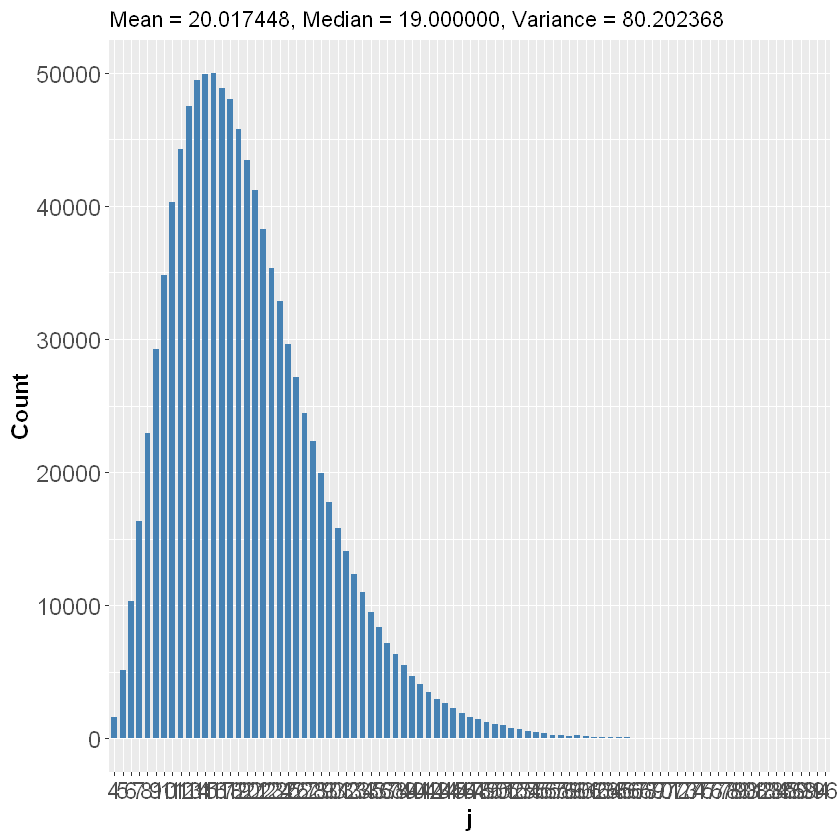

In [38]:
# Plot frequency histogram
r = 4
p = 0.2
nsimulations = 1e06
simulatedData = rnbinom(nsimulations, r, p) + r
dfBinom = as.data.frame(simulatedData)
colnames(dfBinom) = c('Output')
p1 = ggplot(data = dfBinom, aes(x = factor(Output))) +
  geom_bar(stat = 'count', width = 0.7, fill = 'steelblue')+
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold")) +
  labs(x = 'j',
       y = 'Count',
       title = sprintf('Mean = %f, Median = %f, Variance = %f', mean(simulatedData), median(simulatedData), var(simulatedData)))
p1 

In [ ]:
n = 12
p = 0.2
j = c(0:n)
as.data.frame(cbind(j, dbinom(j, n, p)))

In [ ]:
# Plot probability mass function of a binomial random variable
n = 12
p = 0.2
j = c(0:n)
dfBinom = as.data.frame(cbind(j, dbinom(j, n, p)))
colnames(dfBinom) = c('j', 'Prob')
p2 = ggplot(data = dfBinom, aes(x = j, y = Prob)) +
  geom_point(size = 5) +
  scale_x_continuous(breaks = seq(0, n, by = 1)) +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))
p2

In [ ]:
# Plot probability mass function of an exponential random variable
lambda = 10
j = c(0:1e02)
dfPois = as.data.frame(cbind(j, dpois(j, lambda)))
colnames(dfPois) = c('j', 'Prob')
p2 = ggplot(data = dfPois, aes(x = j, y = Prob)) +
  geom_point(size = 3) +
  scale_x_continuous(breaks = seq(0, 100, by = 5)) +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))
p2

Plot the PMF of $X\sim\text{Bin}(n = 10^5, p = 10^{-4})$ and $X\sim\text{Poi}(\lambda = n\times p = 10^5\times 10^{-4} = 10).$

In [ ]:
n = 1e5
p = 1e-4
lambda = n*p 
j = c(0:1e2)
df = as.data.frame(cbind(j, dbinom(j, n, p), dpois(j, lambda)))
colnames(df) = c('j', 'ProbBinom', 'ProbPois')
# A new column can also be added like below 
# df['ProbPois'] = dpois(j, lambda)
p3 = ggplot(data = df, aes(x = j, y = ProbBinom)) +
  geom_point(size = 2, color = 'blue') +
  scale_x_continuous(breaks = seq(0, n, by = 5)) +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))
p3 = p3 + aes(x = j, y = ProbPois) +
  geom_point(size = 2, color = 'red', alpha = 0.5)
p3 = p3 + xlab('j') + ylab('Probability') + ggtitle('Plot of X~Bin(n,p) and X~Poi(lambda)')
p3

**Problem-2**: The number of times that a person contracts a cold in a given year is a Poisson random variable with parameter $\lambda=5.$  Suppose that a new wonder drug (based on large quantities of vitamin C) has just been marketed that reduces the Poisson parameter to $\lambda=2$ for 70 percent of the population. For the remaining population, the drug has no appreciable effect on colds.

1. As a member of a pharmaceutical decision making body, you are interested in knowing how likely is it that the drug is beneficial for an individual if he/she tries the drug for a year and has $1$ cold in that time. Calculate this probability. **Hint**: apply Bayes' theorem to $P(\text{Drug beneficial}\ |\ \text{1 cold}).$
2. You will approve the drug for production if 10 people who tried the drug for a year and have 1 cold in that time each, the probability that the drug is beneficial for at least 8 of them is greater than 98%. Will you approve the drug or not? 

In [ ]:
p_DB = 0.7 # probability that drug is beneficial
p_DNB = 1-p_DB # probability that drug is not beneficial
lambda_DNB = 5
lambda_DB = 2
# Probability that drug is beneficial gievn 1 cold
p = (dpois(1, lambda_DB) * p_DB) / (dpois(1, lambda_DB) * p_DB + dpois(1, lambda_DNB) * p_DNB) 
print(p)
# Probability to decide if you will approve the drug or not
1-pbinom(7, 10, p)
pbinom(10, 10, p) - pbinom(7, 10, p) 
# The drug will be approved

**Problem-4**: Suppose a random number of $K$ customers shop at a supermarket in a day. Let $X_1,X_2,\ldots,X_K$ represent the random number of items purchased independently by the $1$st, $2$nd, $\ldots,$ $K$th customer. The total number of items sold in a day is a random number $Y$ such that: $$ Y = X_1+X_2+\cdots+X_K.$$ Suppose that $30$ customers visit the supermarket on an average per day. Each individual customer is 
* 20% likely to be in the age group 20-40 (encoded as 0) who buys on an average 10 items based on a Poisson distribution. 
* 35% likely to be in the age group 40-60 (encoded as 1) who buys on an average 20 items based on a Poisson distribution.
* 45% likely to be in the age group 60 and above (encoded as 2) who buys on an average 5 items based on a Poisson distribution.

Calculate the probability that the total number of items sold in a day exceeds 350 using simulation. After that, plot a histogram showing the distribution of the total number of items sold in a day. Explain in one sentence the relationship between the mean and median of the total number of items sold in a day using the shape of the histogram.

In [ ]:
customertype = sample(c(0, 1, 2), size = rpois(1, 30), prob = c(0.2, 0.35, 0.45), replace = TRUE)
customertype
sum(customertype == 0)
rpois(sum(customertype == 0), 10)
rpois(sum(customertype == 0), 10) + rpois(sum(customertype == 1), 20) + rpois(sum(customertype == 2), 5)

In [ ]:
nsimulations = 1e5
Y = integer(nsimulations) # create an array full of zeros for the entire simulation
K = rpois(nsimulations, 30)

for (i in 1:nsimulations){
  if (K[i] != 0){
    customertype = sample(c(0, 1, 2), size = K[i], prob = c(0.2, 0.35, 0.45), replace = TRUE)
    Y[i] = sum(rpois(sum(customertype == 0), 10)) + sum(rpois(sum(customertype == 1), 20)) + sum(rpois(sum(customertype == 2), 5))
    }
}

# Fraction of days where the total number of items sold in a day exceeds 350
mean(Y > 350)

$X\sim\text{Poi}(\lambda = 2):$

1. $P_X(j) = P(X = j)$ is the probability mass function (PMF) for $X$ evaluated for the input $j.$ Example, in R, we use $\texttt{dpois(4, lambda)}.$
2. $F_X(j) = P(X \leq j) = P(X=0)+P(X=1)+\cdots+P(X=j)$ is the cumulative distribution function (CDF) for $X$ evaluated for the input $j.$ Example, in R, we use $\texttt{ppois(4, lambda)}.$ 
3. Suppose we want $P(X\geq j).$ Example, in R, we use $\texttt{1-ppois(j-1, lambda)}.$ You could also do $\texttt{ppois(j, lambda, lower.tail = FALSE)}.$
4. Suppose we want to simulate the random variable $X.$ We can do this in R using $\texttt{rpois(nsimulations, lambda)}$. This generates $\texttt{nsimulations}$ independent random values of $X$.
5. Suppose we want the value $j$ for which $P(X \leq j) = 0.95.$ Find the value $j$ for which the accumulated probability is 95%. Example, in R, we use $\texttt{qpois(0.95, lambda)}.$ The answer $j$ is called the 95th percentile or the 0.95th quantile. The 50th percentile is called the median. 

What is the interpretation of 75th percentile - 25th percentile?

In [ ]:
# X~Poi(lambda = 2)
lambda = 2
dpois(4, lambda) # P(X = 4) PMF P_X(4)
ppois(4, lambda) # P(X <= 4) CDF F_X(4)
ppois(4, lambda, lower.tail = FALSE) # P(X >= 4) not the CDF
rpois(4, lambda) # simulating 4 times a Poisson random variable with lambda = 2
qpois(.95, lambda) # this calculates the 95th percentile or 0.95th quantile

In [ ]:
nsimulations = 1e6
lambda = 2
simulatedData = rpois(nsimulations, lambda)
table(simulatedData)
table(simulatedData)/nsimulations
plot(table(simulatedData)/nsimulations)

In [ ]:
lambda = 30
qpois(0.9, lambda) # P(X <= what value) = 0.9
# The value 37 is the 90th percentile (0.9th quantile) of the distribution Poi(lambda = 30)
ppois(37, lambda) # P(X <= 37)
qpois(0.5, lambda) # P(X <= what value) = 0.5, 50th percentile is the median
qpois(0.75, lambda) # P(X <= what value) = 0.75, upper quartile 
qpois(0.25, lambda) # P(X <= what value) = 0.25, lower quartile 
qpois(0.95, lambda) # P(X <= what value) = 0.95

Calculate the expected value, variance, and standard deviation using both theoretical definition and simulation of the random variable:

1. $X\sim\text{Bin}(n = 12, p = 0.2).$
2. $X\sim\text{Bin}(n = 12, p = 0.8).$
3. $X\sim\text{Bin}(n = 12, p = 0.5).$
4. $X\sim\text{Poi}(\lambda = 1.2).$

In [ ]:
# X~Bin(n = 12, p = 0.2)
# Expected value, variance, and standard deviation of X
# using the theoretical definition
n = 12
p = 0.2
x = c(0:n)
E_X = sum(x * dbinom(x, n, p)) # E[X] = n*p
print(E_X)
var_X = sum((x - E_X)^2 * dbinom(x, n, p)) # Var[X] = n*p*(1-p)
print(var_X)
std_X = sqrt(var_X)
print(std_X)

In [ ]:
# Simulate the random variable X~Bin(n=12, p=0.2)
n = 12
p = 0.2
nsimulations = 1e06
simulatedData = rbinom(nsimulations, n, p)
dfBinom = as.data.frame(table(simulatedData))
colnames(dfBinom) = c('Values', 'Frequency')
dfBinom['Probability'] = dfBinom['Frequency'] / nsimulations
head(dfBinom, 5)
p1 = ggplot(data = dfBinom, aes(x = Values, y = Frequency))+
 geom_col(width = 0.7, fill = 'steelblue')+
 ggtitle('Probability mass function X~Bin(n=12, p=0.8)')+
 theme_minimal()
p1

# Expected value using simulation
mean(simulatedData)

# Variance using simulation 
mean((simulatedData - mean(simulatedData))^2)

# Standard deviation using simulation 
sqrt(mean((simulatedData - mean(simulatedData))^2))

# Expected value using theoretical definition
x = c(0:n)
p = dbinom(x, n, p)
sum(x*p)

# Variance using theoretical definition
sum(((x - sum(x*p))^2) * p)

# Standard deviation using definition
sqrt(sum(((x - sum(x*p))^2) * p))


In [ ]:
# Simulate the random variable X~Poi(lambda = 0.5)
lambda = 0.5
nsimulations = 1e06
simulatedData = rpois(nsimulations, lambda)
dfPoi = as.data.frame(table(simulatedData))
colnames(dfPoi) = c('Values', 'Frequency')
dfPoi['Probability'] = dfPoi['Frequency'] / nsimulations
#head(dfPoi, 5)
p1 = ggplot(data = dfPoi, aes(x = Values, y = Frequency))+
 geom_col(width = 0.7, fill = 'steelblue')+
 ggtitle('Probability mass function X~Poi(lambda=0.5)')+
 theme_minimal()
p1

# Expected value using simulation
mean(simulatedData)

# Variance using simulation 
mean((simulatedData - mean(simulatedData))^2)

# Standard deviation using simulation 
sqrt(mean((simulatedData - mean(simulatedData))^2))

# Expected value using theoretical definition
x = c(0:1e2)
p = dpois(x, lambda)
sum(x*p)

# Variance using theoretical definition
sum(((x - sum(x*p))^2) * p)

# Standard deviation using definition
sqrt(sum(((x - sum(x*p))^2) * p))
